# manual calculation of regression and classification

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df=pd.DataFrame({'bmi':[4.5,5.8,6.5,7.0,5.0,6.0,8.6],'gulcose':[190,220,280,320,200,250,380]})
df

,bmi,gulcose
0,4.5,190
1,5.8,220
2,6.5,280
3,7.0,320
4,5.0,200
5,6.0,250
6,8.6,380


##  manual regression prediction  

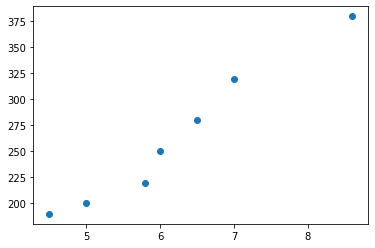

In [4]:
plt.scatter(df['bmi'],df['gulcose'])

strong positive co-relation as bmi increases gulcose also increases

In [7]:
x=df['bmi']
y=df['gulcose']

In [13]:
beta1=np.sum((x-np.mean(x))*(y-np.mean(y)))/np.sum((x-np.mean(x))**2)

In [14]:
beta1

50.00000000000001

In [21]:
beta0=np.mean(y)-beta1*np.mean(x)

In [22]:
beta0

-47.142857142857224

In [23]:
y_pred=beta0+beta1*x

#### these are the predicted values of gulcose

In [24]:
y_pred

0    177.857143
1    242.857143
2    277.857143
3    302.857143
4    202.857143
5    252.857143
6    382.857143
Name: bmi, dtype: float64

#### This is how best fit line for 7 data points

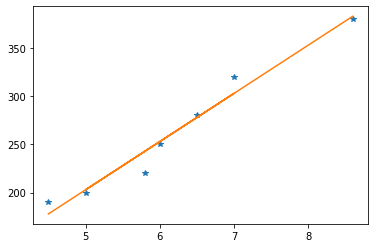

In [26]:
plt.plot(df['bmi'],df['gulcose'],'*')
plt.plot(df['bmi'],y_pred)

Here blue data points are actual and orange line is predicted

#### check co-relation coefficient between y and y_pred

In [27]:
np.corrcoef(y,y_pred)

array([[1.        , 0.98245367],
       [0.98245367, 1.        ]])

In [28]:
0.98245367**2  #R^2

0.9652152136964688

#### cross check with scikit built in function

In [29]:
from sklearn.linear_model import LinearRegression

In [31]:
X=df[['bmi']]
Y=df['gulcose']

In [33]:
LR=LinearRegression()
LR.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [34]:
Y_pred=LR.predict(X)
Y_pred

array([177.85714286, 242.85714286, 277.85714286, 302.85714286,
       202.85714286, 252.85714286, 382.85714286])

In [36]:
LR.coef_

array([50.])

In [37]:
LR.intercept_

-47.14285714285728

In [38]:
LR.score(X,Y) #R^2

0.9652152152152152

#### test for variance two compare two numerical values

In [39]:
from scipy.stats import levene
levene(X,Y)

LeveneResult(statistic=array([11.1425253]), pvalue=array([0.00590947]))

Here p_value is 0.00590947 <0.05 so reject null hypothesis is  variance are same so the variace is diffenent
it has a statistical significance

## logistic regression

In [40]:
df=pd.DataFrame({'bmi':[4.5,5.8,6.5,7.0,5.0,6.0,8.6],'gulcose':[190,220,280,320,200,250,380],'outcome':[0,0,1,1,0,0,1]})
df

,bmi,gulcose,outcome
0,4.5,190,0
1,5.8,220,0
2,6.5,280,1
3,7.0,320,1
4,5.0,200,0
5,6.0,250,0
6,8.6,380,1


#### This time i am gonna predict outcome as a classification problem

In [41]:
x=df['bmi']
y=df['outcome']

In [42]:
beta1=np.sum((x-np.mean(x))*(y-np.mean(y)))/np.sum((x-np.mean(x))**2)

In [43]:
beta1

0.31760435571687845

In [44]:
beta0=np.mean(y)-beta1*np.mean(x)

In [45]:
beta0

-1.5405755768732179

In [47]:
y_pred=beta0+beta1*x

In [48]:
y_pred

0   -0.111356
1    0.301530
2    0.523853
3    0.682655
4    0.047446
5    0.365051
6    1.190822
Name: bmi, dtype: float64

In [52]:
y_pred_prob=1/(1+np.exp(-y_pred)) # logistic regression equation
y_pred_prob

0    0.472190
1    0.574816
2    0.628048
3    0.664331
4    0.511859
5    0.590262
6    0.766888
Name: bmi, dtype: float64

#### now this convert range of continus values are squashing from range of 0 to 1

#### now i check the mean of this values

In [50]:
(1/(1+np.exp(-y_pred))).mean() # logistic regression equation

0.6011993139543458

#### Here we do a cutoff of mean of the y_pred_prob

In [54]:
outcome_pred=[]
for val in y_pred_prob:
    if val>np.mean(y_pred_prob):
        outcome_pred.append(1)
    else:
        outcome_pred.append(0)
print(outcome_pred)

[0, 0, 1, 1, 0, 0, 1]


## This is classify the classes

# [0, 0, 1, 1, 0, 0, 1]

## scikit learn 

In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score 

In [61]:
x=df['bmi']
y=df['outcome']
model = LogisticRegression()
model.fit(X, y)

C:\Users\vikhi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [62]:
predicted_classes = model.predict(X)

In [63]:
predicted_classes

array([0, 0, 1, 1, 0, 0, 1], dtype=int64)

In [66]:
parameters = model.coef_

In [67]:
parameters

array([[0.08412006]])